In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv(r'C:\Users\rafael_fagundes\OneDrive - Dell Technologies\Desktop\New folder\df_final.csv')

df.head()

,Unnamed: 0,Date,Placement,Impressions,Clicks,Reach,Frequency,Visits,Unique Visitors,Total Visits,Vendor,Day,FY,Qtr,Month,Period,WK,QWK,FQ,FQW
0,0,2023-04-07,DV360_RETARGET-1PD RETARGET_DCO-DISPLAY_160x60...,7,0,0.0,0.0,0.0,0.0,0.0,LIVERAMP,Fri,FY2024,Q1,M3,3,9,9,FY2024Q1,FY2024Q1W9
1,1,2023-04-07,DV360_RETARGET-1PD RETARGET_DCO-DISPLAY_300x25...,39,0,0.0,0.0,0.0,0.0,0.0,LIVERAMP,Fri,FY2024,Q1,M3,3,9,9,FY2024Q1,FY2024Q1W9
2,2,2023-04-07,DV360_RETARGET-1PD RETARGET_DCO-DISPLAY_300x60...,24,0,0.0,0.0,0.0,0.0,0.0,LIVERAMP,Fri,FY2024,Q1,M3,3,9,9,FY2024Q1,FY2024Q1W9
3,3,2023-04-07,DV360_RETARGET-1PD RETARGET_DCO-DISPLAY_728x90...,33,0,0.0,0.0,0.0,0.0,0.0,LIVERAMP,Fri,FY2024,Q1,M3,3,9,9,FY2024Q1,FY2024Q1W9
4,4,2023-04-08,DV360_RETARGET-1PD RETARGET_DCO-DISPLAY_160x60...,1,0,0.0,0.0,0.0,0.0,0.0,LIVERAMP,Sat,FY2024,Q1,M3,3,10,10,FY2024Q1,FY2024Q1W10


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

#Remove dates after May 12
df = df[df['Date'] < '2023-05-13']

In [4]:
df_impressions = df.groupby(['Date','Vendor'])['Impressions'].sum().reset_index()
df_reach = df.groupby(['Date','Vendor'])['Reach'].sum().reset_index()
df_frequency = df.groupby(['Date','Vendor'])['Frequency'].sum().reset_index()
df_visits = df.groupby(['Date','Vendor'])['Visits'].sum().reset_index()
df_clicks = df.groupby(['Date','Vendor'])['Clicks'].sum().reset_index()


In [5]:
df_impressions['Date'] = pd.to_datetime(df_impressions['Date'])
df_reach['Date'] = pd.to_datetime(df_reach['Date'])
df_frequency['Date'] = pd.to_datetime(df_frequency['Date'])
df_visits['Date'] = pd.to_datetime(df_visits['Date'])
df_clicks['Date'] = pd.to_datetime(df_clicks['Date'])

In [6]:
#Remove double digits from visits
df_visits.loc[df_visits['Visits'] > 9, 'Visits'] = 0

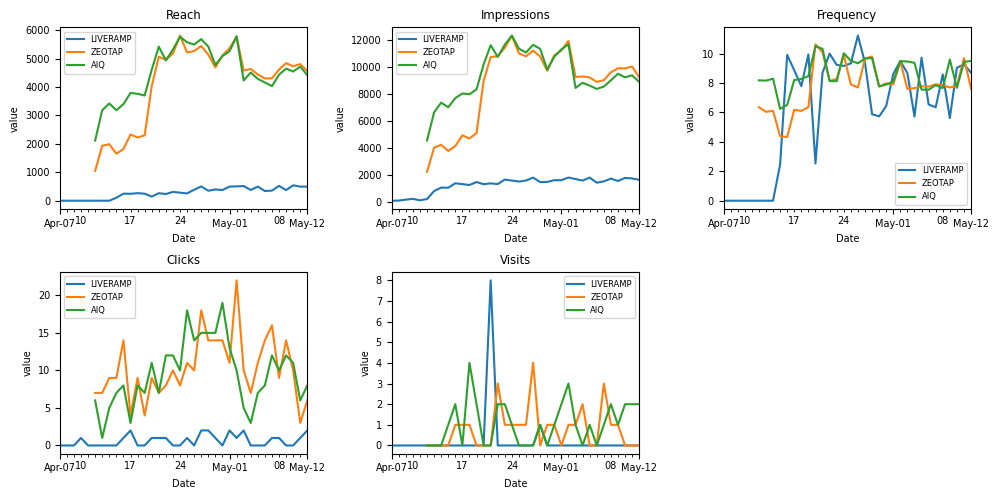

In [9]:
fig = plt.figure(figsize=(10,5))
ax0 = fig.add_subplot(2,3,1)
ax1 = fig.add_subplot(2,3,2)
ax2 = fig.add_subplot(2,3,3)
ax3 = fig.add_subplot(2,3,4)
ax4 = fig.add_subplot(2,3,5)

vendor_order = ['LIVERAMP', 'ZEOTAP', 'AIQ']

df_reach.pivot(index='Date', columns='Vendor', values='Reach').reindex(columns=vendor_order).plot(ax=ax0)
df_impressions.pivot(index='Date', columns='Vendor', values='Impressions').reindex(columns=vendor_order).plot(ax=ax1)
df_frequency.pivot(index='Date', columns='Vendor', values='Frequency').reindex(columns=vendor_order).plot(ax=ax2)
df_clicks.pivot(index='Date', columns='Vendor', values='Clicks').reindex(columns=vendor_order).plot(ax=ax3)
df_visits.pivot(index='Date', columns='Vendor', values='Visits').reindex(columns=vendor_order).plot(ax=ax4)

ax0.set_title('Reach')
ax0.set_xlabel('Date')
ax0.set_ylabel('value')
ax0.legend(fontsize=6)

ax1.set_title('Impressions')
ax1.set_xlabel('Date')
ax1.set_ylabel('value')
ax1.legend(fontsize=6)

ax2.set_title('Frequency')
ax2.set_xlabel('Date')
ax2.set_ylabel('value')
ax2.legend(fontsize=6)

ax3.set_title('Clicks')
ax3.set_xlabel('Date')
ax3.set_ylabel('value')
ax3.legend(fontsize=6)

ax4.set_title('Visits')
ax4.set_xlabel('Date')
ax4.set_ylabel('value')
ax4.legend(fontsize=6)

date_form = mdates.DateFormatter(fmt='%b-%d')
ax0.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax3.xaxis.set_major_formatter(date_form)
ax4.xaxis.set_major_formatter(date_form)

# Rename the legend labels
ax0.legend(labels=['LIVERAMP', 'New Label 2', 'New Label 3'], fontsize=6)
ax1.legend(labels=['LIVERAMP', 'New Label 2', 'New Label 3'], fontsize=6)
ax2.legend(labels=['LIVERAMP', 'New Label 2', 'New Label 3'], fontsize=6)
ax3.legend(labels=['LIVERAMP', 'New Label 2', 'New Label 3'], fontsize=6)
ax4.legend(labels=['LIVERAMP', 'New Label 2', 'New Label 3'], fontsize=6)


plt.tight_layout()
plt.rcParams.update({'font.size': 7})
plt.show()